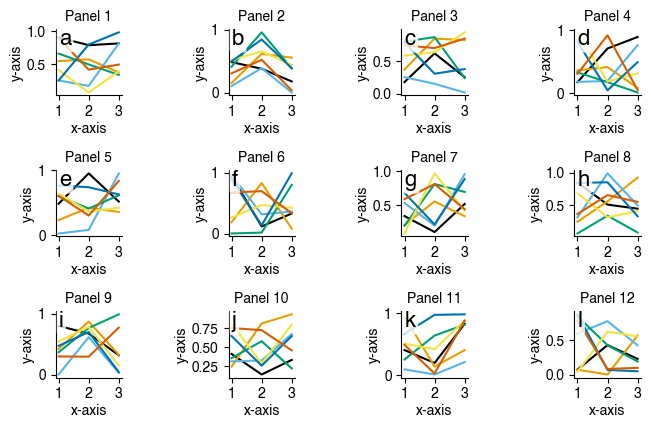

In [1]:
import matplotlib.pyplot as plt
from bss_plot import panels, style
import numpy as np

style.use_style("bss")

# Double-column figure
fig, axs = plt.subplots(nrows=3, ncols=4)

for i in range(len(axs.flat)):
    ax = axs.flat[i]
    ax.set_title(f"Panel {i + 1}")
    for _ in range(7):  # Three random lines per subplot
        ax.plot(np.arange(1, 4), np.random.rand(3))

    panels.add_panel_number(ax, i + 1)
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.set_box_aspect(1)

plt.show()

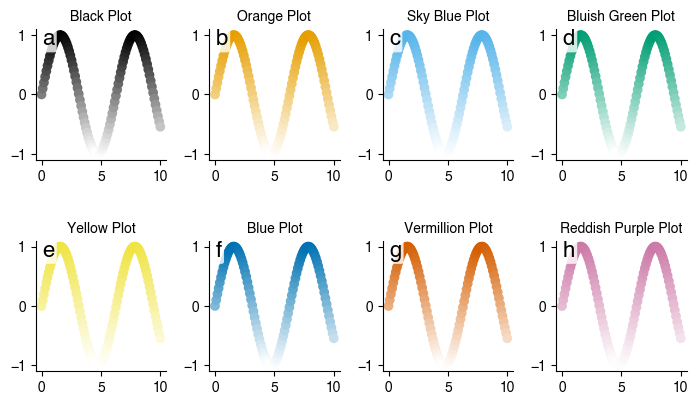

In [15]:
from bss_plot import colors
import matplotlib.pyplot as plt
import numpy as np

palette = colors.colorblind_palette
colormaps = palette.create_sequential_colormaps()


def sequential_cmap_example(colormaps):
    n = len(colormaps)
    rows = int(
        np.ceil(n / 4)
    )  # Adjusts rows based on the length of colormaps, with 4 columns
    fig, ax = plt.subplots(nrows=rows, ncols=4)

    for i, (name, cmap) in enumerate(colormaps.items()):
        x = np.linspace(0, 10, 100)
        y = np.sin(x)

        ax.flat[i].scatter(x, y, c=y, cmap=cmap)
        ax.flat[i].set_title(f"{name} Plot")
        ax.flat[i].set_box_aspect(1)
        panels.add_panel_number(ax.flat[i], i + 1)

    # Hide any unused subplots
    for j in range(i + 1, len(ax.flat)):
        fig.delaxes(ax.flat[j])

    plt.tight_layout()
    plt.savefig("single_color_cmap_example.png", dpi=800)
    plt.show()


sequential_cmap_example(colormaps)

Text(0.5, 1.0, 'ggsci palette')

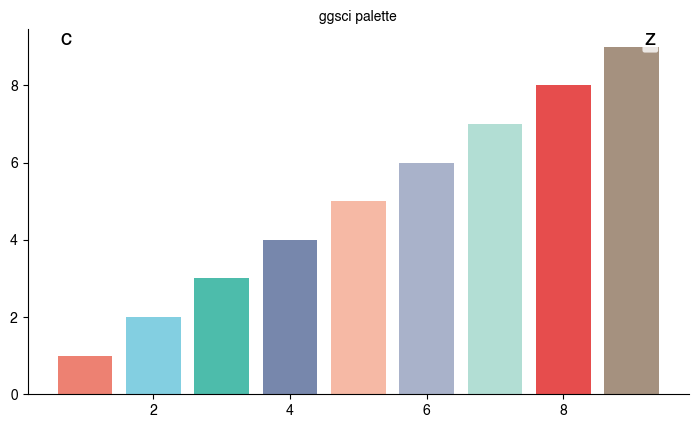

In [3]:
from bss_plot import panels

colors.ggsci_palette.update_rc_params()

fig, ax = plt.subplots()

ax.bar(
    [1, 2, 3, 4, 5, 6, 7, 8, 9],
    [1, 2, 3, 4, 5, 6, 7, 8, 9],
    color=colors.ggsci_palette.get_hex_colors(),
)
panels.add_panel_number(ax, label=3)
panels.add_panel_number(ax, label=26, loc="upper right")
plt.title("ggsci palette")

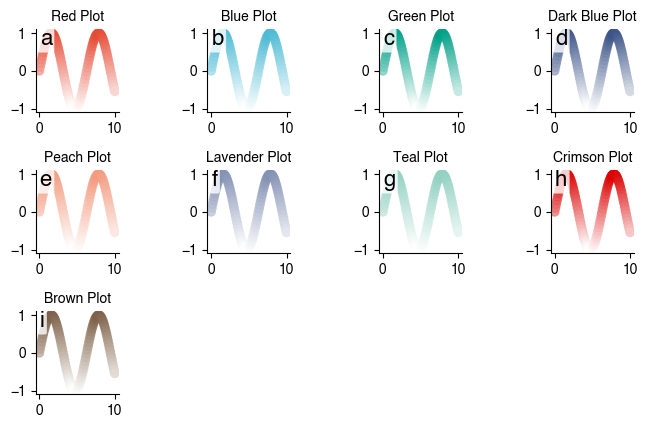

In [4]:
palette = colors.ggsci_palette

colormaps = palette.create_sequential_colormaps()

sequential_cmap_example(colormaps)

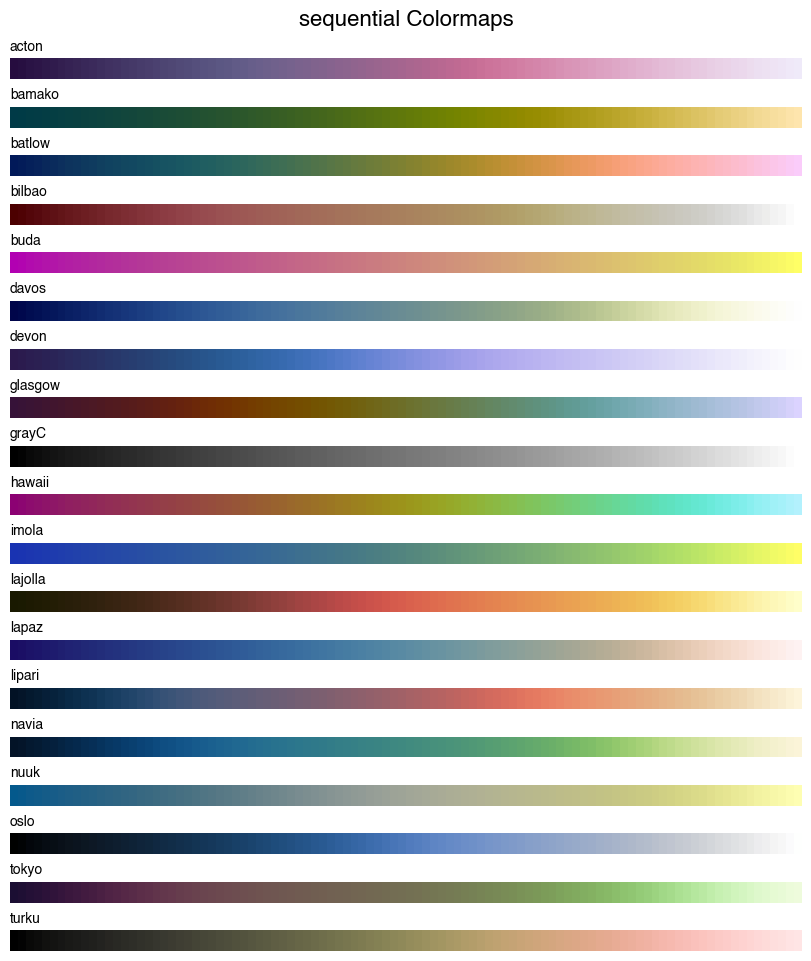

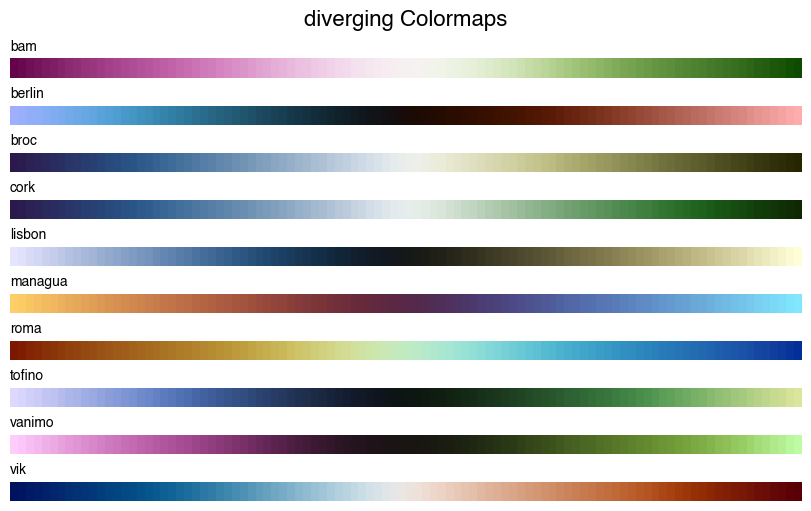

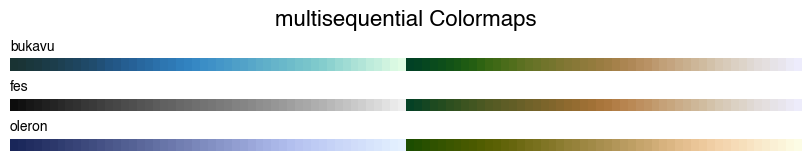

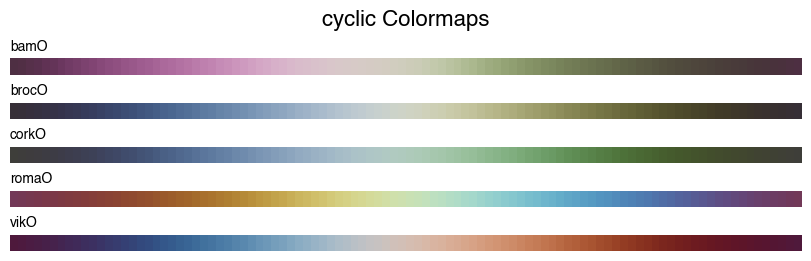

In [5]:
from bss_plot import colors

# Initialize ColorLoader to load all palettes
loader = colors.ColorLoader()
palettes = loader.palettes

# Set up the figure size based on the number of palettes

for cmaptype, palettes_by_type in palettes.items():
    num_palettes = len(palettes_by_type)
    fig, axes = plt.subplots(
        num_palettes, 1, figsize=(8, 0.5 * num_palettes), constrained_layout=True
    )
    fig.suptitle(f"{cmaptype} Colormaps", fontsize=16)

    # Loop over each palette and create a plot for its colormap
    for ax, (name, palette) in zip(axes, palettes_by_type.items()):
        cmap = palette.create_colormap()  # Generate colormap from the palette
        gradient = [list(range(100))]  # Create a gradient array for plotting

        # Display the colormap as a horizontal bar
        ax.imshow(gradient, aspect="auto", cmap=cmap)
        ax.set_title(name, loc="left", fontsize=10)
        ax.axis("off")  # Hide axis ticks

# Show the plot
plt.show()

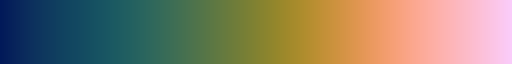

In [6]:
loader.get_palette('batlow').get_cmap()

Text(0.5, 1.0, 'viridis')

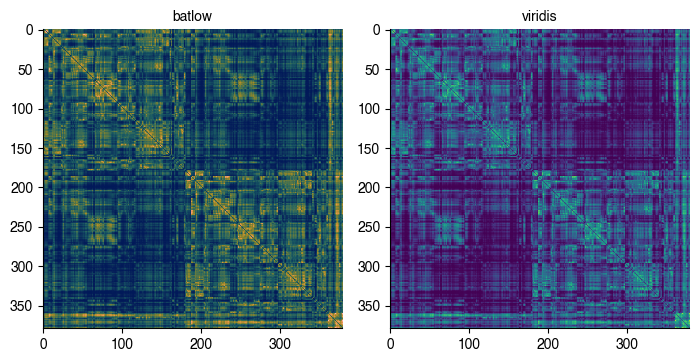

In [7]:
from bss_plot import data

fig, axs = plt.subplots(ncols=2)
axs[0].imshow(
    data.hcp_sc,
    cmap=loader.get_palette("batlow").get_cmap(),
)
axs[0].set_title("batlow")
axs[1].imshow(
    data.hcp_sc,
    cmap="viridis",
)
axs[1].set_title("viridis")

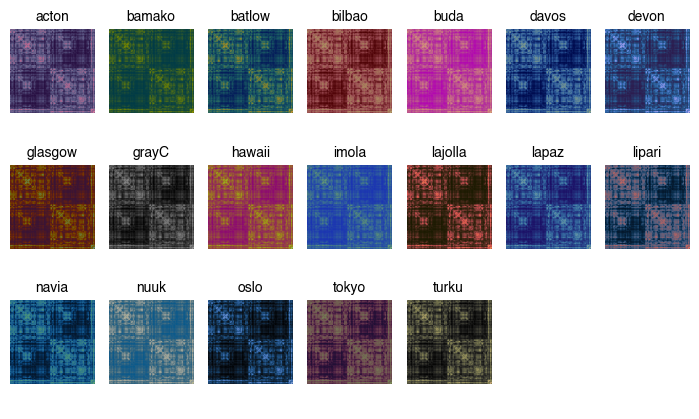

In [8]:
import matplotlib.pyplot as plt
from bss_plot import data

# Calculate the number of rows and columns for the subplots grid
num_palettes = len(palettes['sequential'])
ncols = 7
nrows = (num_palettes + ncols - 1) // ncols  # Adjust rows based on number of palettes

# Create a grid for displaying all sequential palettes
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)

# Flatten axs to easily iterate, handling grids of any size
axs = axs.flat if num_palettes > 1 else [axs]

# Loop over each palette and display it using imshow
for ax, palette_name in zip(axs, palettes['sequential']):
    ax.imshow(data.hcp_sc, cmap=loader.get_palette(palette_name).get_cmap())
    ax.set_title(palette_name)
    ax.axis('off')  # Optional: turn off axis

# Hide any unused axes if the grid is larger than the number of palettes
for ax in axs[num_palettes:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

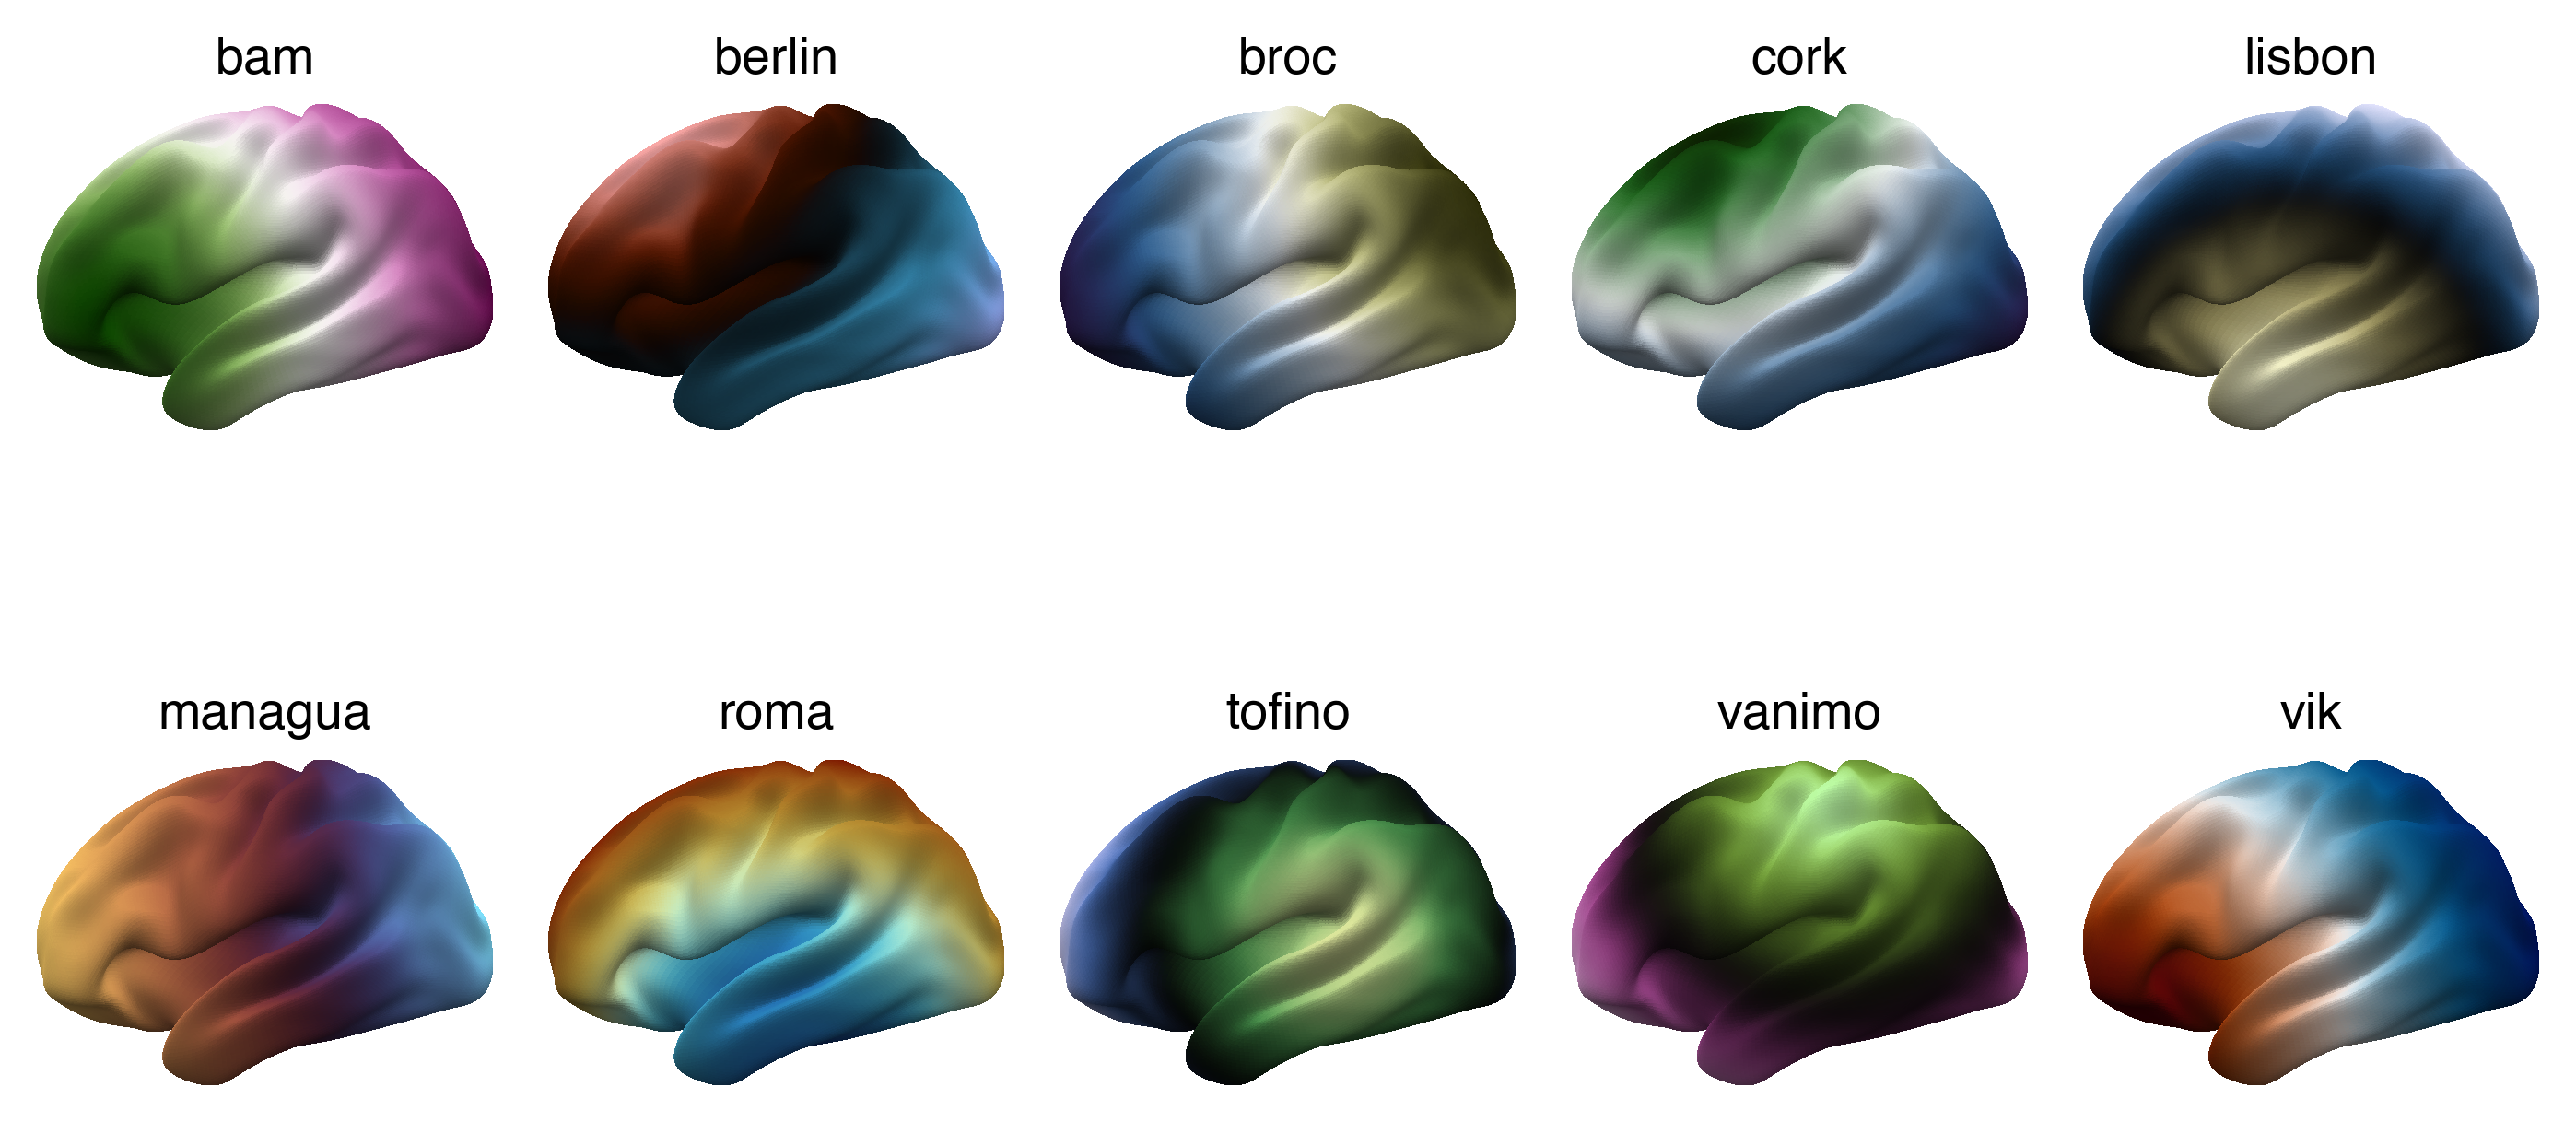

In [13]:
import random
import templateflow
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np
from bss_plot import matplotlib_surface_plotting as msp
from bss_plot import colors

fsLR_lh = templateflow.api.get(
    template="fsLR", density="32k", suffix="inflated", hemi="L"
)

fsLR_rh = templateflow.api.get(
    template="fsLR", density="32k", suffix="inflated", hemi="R"
)

lh = nib.load(fsLR_lh)
rh = nib.load(fsLR_rh)

vertices, triangles = lh.agg_data()


def get_rand_data():
    pattern = np.zeros(len(vertices))

    # Define parameters for Gaussian spread
    center_vertex = random.choice(range(len(vertices)))
    sigma = 100.0  # Standard deviation of the Gaussian
    # Calculate distances from the center vertex to all other vertices
    distances = np.linalg.norm(vertices - vertices[center_vertex], axis=1)

    # Apply Gaussian function
    pattern = np.exp(-0.5 * (distances / sigma) ** 2)

    return pattern


loader = colors.ColorLoader()
palettes = loader.palettes

# Calculate the number of rows and columns for the subplots grid
num_palettes = len(palettes["diverging"])
ncols = 5
nrows = (num_palettes + ncols - 1) // ncols  # Adjust rows based on number of palettes

# Create a grid for displaying all sequential palettes
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, dpi=400)

# Flatten axs to easily iterate, handling grids of any size
axs = axs.flat if num_palettes > 1 else [axs]

# Loop over each palette and display it using imshow
for ax, palette_name in zip(axs, palettes["diverging"]):
    msp.plot_surf(
        vertices,
        triangles,
        overlay=get_rand_data(),
        ax=ax,
        view="lateral",
        cmap=loader.get_palette(palette_name, maptype="diverging").get_cmap(),
    )

    ax.set_title(palette_name)
    ax.axis("off")  # Optional: turn off axis


plt.tight_layout()
plt.savefig("diverging_palettes.png", dpi=800)
plt.show()